Loading the dataset in Notebook:


In [1]:
#Census dataset uploaded from location in local computer
from google.colab import files
uploaded = files.upload()

Saving census-income .csv to census-income  (1).csv


Importing the libraries for Model:


In [2]:
#Python libraries for data handling:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Model and metrics for analysis:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#For splitiing dataset in train/test split case:
from sklearn.model_selection import train_test_split

#VIF analysis
#We'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#For Label Encoding:
from sklearn.preprocessing import LabelEncoder

#This is imported to ignore the warning messages being displayed:
import warnings
warnings.filterwarnings("ignore")

Loading dataset in a pandas dataframe:


In [3]:
# 'Income' pandas dataframe created , df.read_csv cmd used to read the loaded dataset in DF, path copied from rt click & pasting it directly.
income = pd.read_csv(r'/content/census-income .csv')
income.head(7)
#Returns top 5 records from the dataset
#df.head(n) >> where 'n' is any natural number , fetches that many records starting from (0 -- n-1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


Exploratory data analysis:


In [4]:
#Fetches first 5 records of the dataset by deafault
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#Fetches last 4 records of the dataset
income.tail(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
#Checking the total columns present in dataset
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [7]:
#Checking the shape of data
#(rows,column) >> we get output in form of this when we use df.shape
income.shape

(32561, 15)

In [8]:
#Displaying the column names in form of list, storing it in "ColIncome" & displaying it later
colIncome = list(income.columns)
colIncome

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'annual_income']

In [9]:
#df.info is used to check the overall information of the given dataset
income.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
#Here we can see that there are 15 columns, some are of object data-type, to build a model we need numeric data types, so we will convert these in later part of code


In [11]:
#Checking Non-NULL values
#if null values are present in the dataset we either remove them by substituting them by mean/median/mode OR
# dropping them altogether by checking if they are outliers.

#the df.isnull() returns values as FALSE if the arguments have values
#it will return TRUE if there are some NULL values present

income.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Counting the total number of diffrent type of  values within a column
income['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
income['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [14]:
#Checking the unique Non -repeated data within an column in dataset, returns the unique values
income['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

In [15]:
income['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
income['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [17]:
#Displaying the basic stats for the given dataset
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
#Fetching the datatypes of all of the columns:
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [19]:
#Getting the total number of null values
#Here 0 indicates that hereare no null values
income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [20]:
#There are 7 different values within the marital-status column, this cmd stores total count of these 7 diffrent values within 'C'
c=income['marital-status'].value_counts().tolist()
c

[14976, 10683, 4443, 1025, 993, 418, 23]

In [21]:
#there are 14976 people who are never married and so on
income['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [22]:
#Chekcing the correlation between the numeric features
income.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


BoxPlot for dealing the outliers:


In [23]:
colIncome

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'annual_income']

In [26]:
#This is imported to ignore the warning messages being displayed
import warnings
warnings.filterwarnings("ignore")

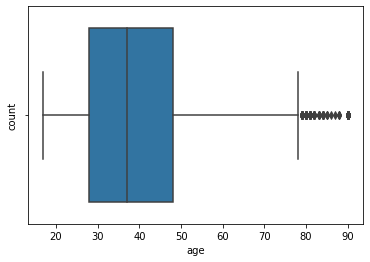

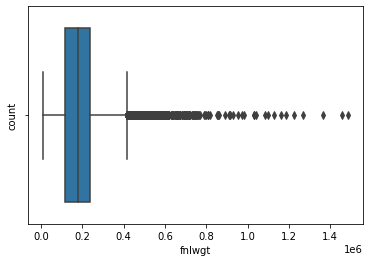

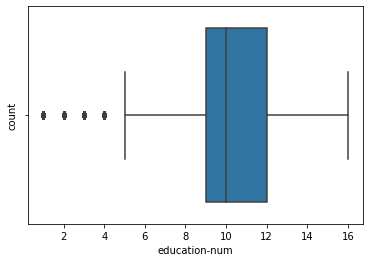

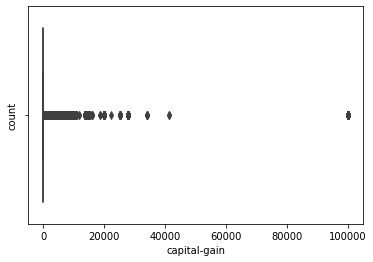

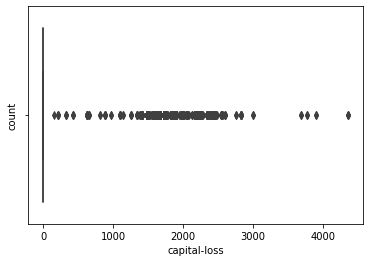

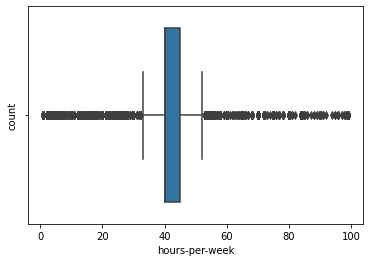

In [27]:
#Using boxplot we will be visualizing the outliers,after that we will be using IQR method and handling the outliers.
for col_name in colIncome:
    if(income[col_name].dtypes=='int64' or income[col_name].dtypes=='float64'):
        sns.boxplot(income[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [43]:
#handling  the Outliers :
#data is being stored in income again within the columns as outliers are being removed post this operation

col_names=['age','fnlwgt','education-num','hours-per-week','capital-gain',
 'capital-loss']
Q1 = income.age.quantile(0.25)
Q3 = income.age.quantile(0.75)
IQR = Q3 - Q1
income = income[(income.age >= Q1 - 1.5*IQR) & (income.age <= Q3 + 1.5*IQR)]


Q1 = income.fnlwgt.quantile(0.25)
Q3 = income.fnlwgt.quantile(0.75)
IQR = Q3 - Q1
income = income[(income.fnlwgt >= Q1 - 1.5*IQR) & (income.fnlwgt <= Q3 + 1.5*IQR)]

#here as the columns name contains a '-' hyphen , hence its called using dataframe so as to deal with the outliers

Q1 = income['education-num'].quantile(0.25)
Q3 = income['education-num'].quantile(0.75)
IQR = Q3 - Q1
income = income[(income['education-num'] >= Q1 - 1.5*IQR) & (income['education-num'] <= Q3 + 1.5*IQR)]

Q1 = income['hours-per-week'].quantile(0.25)
Q3 = income['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
income = income[(income['hours-per-week'] >= Q1 - 1.5*IQR) & (income['hours-per-week'] <= Q3 + 1.5*IQR)]

Q1 = income['capital-gain'].quantile(0.25)
Q3 = income['capital-gain'].quantile(0.75)
IQR = Q3 - Q1
income = income[(income['capital-gain'] >= Q1 - 1.5*IQR) & (income['capital-gain'] <= Q3 + 1.5*IQR)]

Q1 = income['capital-loss'].quantile(0.25)
Q3 = income['capital-loss'].quantile(0.75)
IQR = Q3 - Q1
income = income[(income['capital-loss'] >= Q1 - 1.5*IQR) & (income['capital-loss'] <= Q3 + 1.5*IQR)]

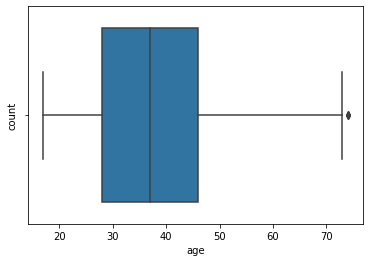

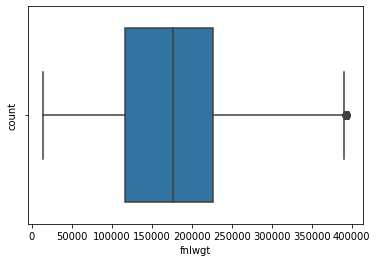

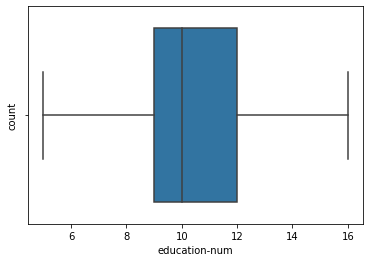

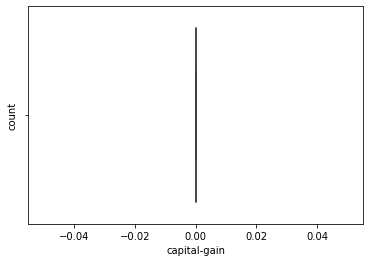

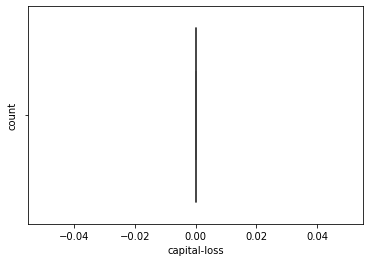

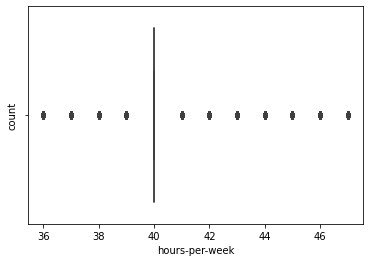

In [44]:
#printing the outliers again as to show that outliers have been removed
#So we are done with Handling outliers so once again we'll plot the box plot and check the difference before and after.

#From the above box plot we can visualize that all the outliers have been removed

for col_name in colIncome:
    if(income[col_name].dtypes=='int64' or income[col_name].dtypes=='float64'):
        sns.boxplot(income[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

Missing Value Analysis:


In [45]:
#Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

income.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [46]:
#Chekcing the data types
income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [47]:
#As we can see the data type of annual income is object
income['annual_income']

2        <=50K
3        <=50K
4        <=50K
5        <=50K
7         >50K
         ...  
32554     >50K
32555    <=50K
32556    <=50K
32557     >50K
32558    <=50K
Name: annual_income, Length: 15013, dtype: object

In [54]:
#converting datatype by replacing the values
income['annual_income'] = np.where(income['annual_income'] == 'yes',1,0)
income['annual_income'].dtype

dtype('int64')

In [55]:
income['annual_income']

2        0
3        0
4        0
5        0
7        0
        ..
32554    0
32555    0
32556    0
32557    0
32558    0
Name: annual_income, Length: 15013, dtype: int64

In [56]:
for col in colIncome:
    if income[col].dtypes=='object':
        #print('ob')
        income[col] = income[col].fillna(income[col].mode()[0])
    else:
        #print('num')
       income[col] = income[col].fillna(income[col].mean())

In [57]:
income.tail(9)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,0
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,0
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,0
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


IV Analysis:


In [58]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

One hot encoding:


In [59]:
#one hot encoding
col_list = []
for col in income.columns:
    if ((income[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

df_2 = pd.get_dummies(income[col_list],drop_first=True)

for col in df_2.columns:
    df_2[col] =  df_2[col].astype(int)
df_2.shape

(15013, 89)

In [60]:
income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0


In [61]:
df_2

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32555,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
df_2.columns

Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-se

In [63]:
df_combined = pd.concat([data, df_2], axis=1)
df_combined.shape 

(23499, 104)

In [64]:
df_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Label Encoding:


In [68]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    income[i]=labelencoder.fit_transform(income[i])

In [69]:
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,38,0
7,52,6,209642,8,9,2,4,0,4,1,0,0,45,38,0


Model Build:


In [75]:
Ind_Features = list(income.columns)
Ind_Features.remove('annual_income')
x = income[Ind_Features]
y = income['annual_income']

In [77]:
income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,38,0
7,52,6,209642,8,9,2,4,0,4,1,0,0,45,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,4,321865,9,14,2,4,0,4,1,0,0,40,38,0
32555,22,4,310152,11,10,4,11,1,4,1,0,0,40,38,0
32556,27,4,257302,4,12,2,13,5,4,0,0,0,38,38,0
32557,40,4,154374,8,9,2,7,0,4,1,0,0,40,38,0


In [78]:
y

2        0
3        0
4        0
5        0
7        0
        ..
32554    0
32555    0
32556    0
32557    0
32558    0
Name: annual_income, Length: 15013, dtype: int64

In [79]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,38
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,38
7,52,6,209642,8,9,2,4,0,4,1,0,0,45,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,4,321865,9,14,2,4,0,4,1,0,0,40,38
32555,22,4,310152,11,10,4,11,1,4,1,0,0,40,38
32556,27,4,257302,4,12,2,13,5,4,0,0,0,38,38
32557,40,4,154374,8,9,2,7,0,4,1,0,0,40,38


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [80]:
pd.DataFrame(x_train)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
12085,24,4,177287,2,8,4,8,3,4,0,0,0,38,38
4647,33,4,343925,8,9,4,6,1,2,1,0,0,40,22
29835,26,0,182332,5,11,2,0,5,4,0,0,0,40,38
29919,23,4,380544,11,10,2,1,0,4,1,0,0,40,38
2036,19,0,33487,11,10,4,0,2,0,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28313,28,4,204734,11,10,2,13,5,4,0,0,0,40,38
7158,27,4,188519,8,9,0,12,3,4,0,0,0,40,38
21226,47,4,202812,9,14,2,10,0,4,1,0,0,40,0
23279,50,4,194231,9,14,0,12,1,4,0,0,0,40,38


In [81]:
pd.DataFrame(x_test)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
28508,35,4,117381,6,13,0,12,1,4,1,0,0,40,38
720,33,4,182556,8,9,4,8,1,4,1,0,0,40,38
23944,23,4,117480,0,6,4,3,3,4,1,0,0,44,38
12113,67,4,95113,8,9,2,4,0,4,1,0,0,37,38
11482,38,4,168055,5,11,2,8,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8242,29,4,263831,6,13,4,1,3,4,0,0,0,40,38
10408,39,4,137522,8,9,2,7,0,1,1,0,0,40,0
32279,36,4,258102,8,9,4,6,1,4,1,0,0,40,38
471,22,0,139883,11,10,4,0,3,4,1,0,0,40,38


In [82]:
y_train

12085    0
4647     0
29835    0
29919    0
2036     0
        ..
28313    0
7158     0
21226    0
23279    0
5983     0
Name: annual_income, Length: 11259, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression

In [86]:
logisticRegr = LogisticRegression()

In [ ]:
#Model Fitting/Training
logisticRegr.fit(x_train, y_train)

In [ ]:
test_pred = logisticRegr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)